<a href="https://colab.research.google.com/github/florananda/ALA-AI-Course/blob/main/Weather_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries

In [2]:
import pandas as pd


Mount Google Drive. Copy path. read the csv file

In [44]:
weather = pd.read_csv('/content/drive/MyDrive/ALA Training/10-12 AI Training/Code and Data/Weather Forecast/Climate-Data-From-NOAA.csv',index_col='DATE')

Print the csv file

In [45]:
weather

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.38,1545.0,1532.0,0.00,0.0,0.0,39.0,46,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.61,1826.0,1837.0,0.00,0.0,0.0,46.0,54,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",3.13,1045.0,934.0,0.00,0.0,0.0,53.0,60,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",14.54,1841.0,1840.0,0.62,0.0,0.0,51.0,55,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.67,851.0,858.0,0.04,0.0,0.0,38.0,47,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",8.50,NaN,NaN,0.19,0.0,0.0,41.0,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",14.09,NaN,NaN,0.00,0.0,0.0,37.0,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.74,NaN,NaN,0.00,0.0,0.0,37.0,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Prepare Data:***
Clean data by removing the Null columns. Data is missing for these columns.

In [54]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.0
NAME       0.0
PRCP       0.0
SNOW       0.0
TMAX       0.0
TMIN       0.0
dtype: float64

In [47]:
columns_needed = weather.columns[weather.apply(pd.isnull).sum()==0]

In [48]:
columns_needed

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'TMAX', 'TMIN'], dtype='object')

**Keep Only the valid columns**

In [49]:
weather=weather[columns_needed].copy()
weather

,STATION,NAME,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,
2000-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,46,31
2000-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,54,37
2000-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,60,46
2000-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.62,0.0,55,47
2000-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.04,0.0,47,28
...,...,...,...,...,...,...
2024-02-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.19,0.0,42,37
2024-02-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,43,32
2024-02-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,46,30


In [50]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.0
NAME       0.0
PRCP       0.0
SNOW       0.0
TMAX       0.0
TMIN       0.0
dtype: float64

Plot the data

<Axes: xlabel='DATE'>

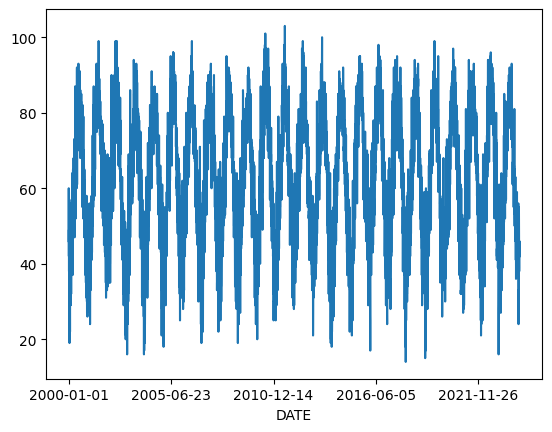

In [52]:
weather["TMAX"].plot()

<Axes: xlabel='DATE'>

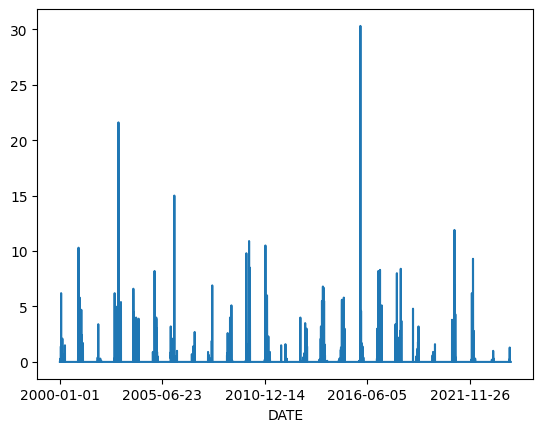

In [56]:
weather["SNOW"].plot()